# Pixel Inverter in Programmable Logic (PL)

## This demo has 2 tests. 
    1. Invert a couple values in a buffer.
    2. Invert all pixel values in an image.

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pynq import allocate, Overlay

In [2]:
# Inverter_design = Overlay("Pixel_Controller.bit")
Inverter_design = Overlay("Pixel_Controller_ILA.bit")

In [3]:
dma = Inverter_design.axi_dma_0
controller = Inverter_design.Pixel_Controller_0

In [4]:
def run_kernel():
    dma.sendchannel.transfer(in_buffer)
    dma.recvchannel.transfer(out_buffer)
    dma.sendchannel.wait()
    dma.recvchannel.wait()

## Test 1 - Small buffer

In [5]:
width = 5
height = 5

in_buffer = allocate(shape=(height, width, 1),dtype=np.uint8, cacheable=1)
out_buffer = allocate(shape=(height,width, 1),dtype=np.uint8, cacheable=1)

In [6]:
for i in range(height):
    for j in range(width):
        in_buffer[i][j] = j + (i*width) #Put some unique data into the buffer

In [7]:
#Choose whether to invert or not with the data. This also tests the ability to R/W using axi

# controller.write(0x00,0x00) # no-invert
controller.write(0x00,0xff) # invert

controller.read(0x00) #Read the value back. Should be the same as whatever was put in

255

In [8]:
run_kernel()

In [9]:
for i in range(height):
    print("Row:%d" % (i))
    for j in range(width):
        print("out_buffer[%d][%d] = %d" % (i,j,out_buffer[i][j][0]))
        
    print()

Row:0
out_buffer[0][0] = 255
out_buffer[0][1] = 254
out_buffer[0][2] = 253
out_buffer[0][3] = 252
out_buffer[0][4] = 251

Row:1
out_buffer[1][0] = 250
out_buffer[1][1] = 249
out_buffer[1][2] = 248
out_buffer[1][3] = 247
out_buffer[1][4] = 246

Row:2
out_buffer[2][0] = 245
out_buffer[2][1] = 244
out_buffer[2][2] = 243
out_buffer[2][3] = 242
out_buffer[2][4] = 241

Row:3
out_buffer[3][0] = 240
out_buffer[3][1] = 239
out_buffer[3][2] = 238
out_buffer[3][3] = 237
out_buffer[3][4] = 236

Row:4
out_buffer[4][0] = 235
out_buffer[4][1] = 234
out_buffer[4][2] = 233
out_buffer[4][3] = 232
out_buffer[4][4] = 231



## Test 2 - JPG Application 

In [10]:
#image_path = "images/fade-square.jpg"
#image_path = "images/blueberry_bread.jpg"
image_path = "images/sunset.jpg"
original_image = Image.open(image_path)

In [11]:
#Picture metadata
width, height = original_image.size

In [12]:
in_buffer = allocate(shape=(height, width, 3),dtype=np.uint8, cacheable=1)
out_buffer = allocate(shape=(height, width, 3),dtype=np.uint8, cacheable=1)

In [13]:
in_buffer[:] = np.array(original_image)

Original Image size: 1888x1890 pixels.


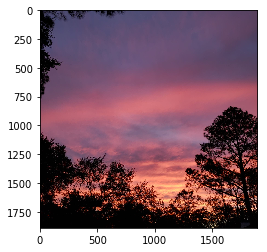

In [14]:
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size)
print("Original Image size: {}x{} pixels.".format(width, height))
_ = plt.imshow(original_image)

In [15]:
controller.write(0x00,0x00) # no-invert
# controller.write(0x00,0x01) # invert
run_kernel()
resized_image = Image.fromarray(out_buffer)

Inverted Image size: 1888x1890 pixels.


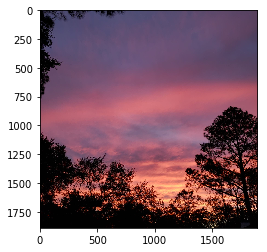

In [37]:
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size)
print("Inverted Image size: {}x{} pixels.".format(width, height))
_ = plt.imshow(resized_image)

In [17]:
%%timeit
run_kernel()

10 loops, best of 3: 74.1 ms per loop


In [16]:
out_buffer

PynqBuffer([[[ 0,  0,  4],
             [ 0,  0,  4],
             [ 0,  0,  4],
             ...,
             [86, 63, 92],
             [86, 63, 92],
             [86, 63, 92]],

            [[ 0,  0,  4],
             [ 0,  0,  4],
             [ 0,  0,  4],
             ...,
             [86, 63, 92],
             [86, 63, 92],
             [86, 63, 92]],

            [[ 0,  0,  4],
             [ 0,  0,  4],
             [ 0,  0,  4],
             ...,
             [86, 63, 92],
             [86, 63, 92],
             [86, 63, 92]],

            ...,

            [[ 1,  1,  1],
             [ 1,  1,  1],
             [ 1,  1,  1],
             ...,
             [ 1,  1,  1],
             [ 1,  1,  1],
             [ 1,  1,  1]],

            [[ 1,  1,  1],
             [ 1,  1,  1],
             [ 1,  1,  1],
             ...,
             [ 1,  1,  1],
             [ 1,  1,  1],
             [ 1,  1,  1]],

            [[ 1,  1,  1],
             [ 1,  1,  1],
             [ 1, 